# Running FreeFem++ inside a Notebook

<div align="right"> <a href="mailto:pascal.lafon@utt.fr">Pascal Lafon</a> - Novembre 2020 </div>

----
### Bi directionnal communication with  `FreeFem++` in a Notebook :
* This notebook presents basic concept to pass parameters from command line to `FreeFem++` and read results from `FreeFem++`.
* To use this notebook, you will need to have :
    * `FreeFem++` installed on your machine
    * The file `getARV.idp`, which define the function `getARV` in the same folder as this notebook file.
    * The file `cantilver-2D.edp`, the model of the cantilever beam in the same folder as this notebook file.
    * You must also check that can run `FreeFem++` using the command line `>>FreeFem++ cantilever-2D.edp`.
    * The file `run_freefem.py`, the python module to pass parameters to `FreeFem++` and read results. This file must be in the same folder as this notebook file. 
    * Read and understand [Run FreeFem++ in notebook](https://github.com/PasLafon/MP06-FreeFem-in-Notebook01/blob/master/FreeFem_in_notebook_01.ipynb) and [Pass parameters to  FreeFem++](https://github.com/PasLafon/MP06-FreeFem-in-Notebook02/blob/master/FreeFem_in_notebook_02.ipynb)
----

### Module `run_freefem.py` :

This python program (which is package as an python module) is enable to  :
* Bluid the proper command line with parameter defined when calling this module to launch `FreeFem++`.
* Read output of `FreeFem++` and extract all valid numerical values found in output.
* In addition, this module :
    * Compare the input value to the last correct given one, if these values are identical, the simulation is NOT launch, and the last corresponding output is return.
    * Check the error from `FreeFem++` and return no numerical value and the error message from `FreeFem++`.

### Example of usage :

In this short example, we use the model `cantilver-2D.edp` in which the rayon `r` of the hole will vary from  $2$ to $8$. Then we plot the *von Mises* maximal stress for each value of `r`.

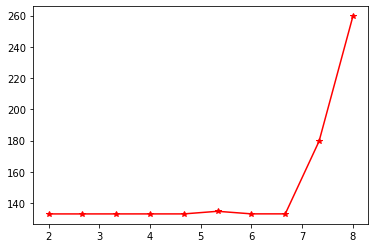

In [1]:
import run_freefem as rf        # Importation of module run_freefem, named 'rf'
import numpy as np              # Numpy for array
import matplotlib.pyplot as plt # pyplot from matplotlib to plot graphics.

# 10 values of radius from 2 to 8 :
r_val = np.linspace(2,8,10)
# Initialize an empty list (https://www.w3schools.com/python/python_lists.asp)
sigmax = []

# For loop :
for r in r_val:
    # Define input values with a Dictionary in Python (https://www.w3schools.com/python/python_dictionaries.asp)
    # The keys 'l','h','r' correspond to the name of input arguments define in the '.edp' file.
    input_value = {'l':400,'h':20,'r':r}
    Out = rf.run_freefem('cantilever-2D.edp',input_value)
    # Out[0]-> an array of output values
    #  (depending on how many output values are written in the '.edp' file)
    # Out[0][2] -> the third value of this array.
    sigmax.append(Out[0][2])


plt.plot(r_val,sigmax,'r*-')

### Next step : [Plotting the response of FreeFem++ on a two parameters space](https://github.com/PasLafon/MP06-FreeFem-in-Notebook/blob/master/FreeFem_in_notebook_04.ipynb)